# DreaMS embeddings

DreaMS (Deep Representations Empowering the Annotation of Mass Spectra) embeddings are high-dimensional vector representations of MS/MS spectra, derived from our transformer neural network trained on millions of mass spectra from the MassIVE GNPS repository. For details, please refer to [our paper](https://chemrxiv.org/engage/chemrxiv/article-details/6626775021291e5d1d61967f). The paper demonstrates that DreaMS representations of spectra encode the molecular structures corresponding to those spectra. As a result, DreaMS can serve as a core for various mass spectrum annotation tasks, such as library matching, molecular networking, or molecular property prediction.

## Computing embeddings

Let’s see how to generate DreaMS embeddings for a given `.mzML` file in a single line of code.

In [2]:
from dreams.api import dreams_embeddings
dreams_embs = dreams_embeddings('../data/MSV00008490/G72676_BB5_01_18927.mzML')
dreams_embs.shape

Computing DreaMS embedding: 100%|██████████| 2308/2308 [00:56<00:00, 40.80it/s]


(2308, 1024)

The resulting `dreams_embs` object is a NumPy matrix with 2308 rows and 1024 columns. Each row represents a 1024-dimensional DreaMS embedding for one of the 2308 MS/MS spectra present in the input `.mzML` file.

Note that computing 2308 embeddings took less than a minute on a laptop (MacBook M1). However, the computation is orders of magnitude faster on a GPU machine.

## Visualizing embeddings with UMAP

The DreaMS embeddings can be visualized using UMAP, a dimensionality reduction technique that is well-suited for visualizing high-dimensional data. We will use it to map 1024-dimensional DreaMS embeddings into 2D space and then color each embedding (i.e., point) based on different properties (formula type and precursor m/z). For this purpose, we will use a large sample of 100,000 pre-computed embeddings from the [MassSpecGym dataset](https://github.com/pluskal-lab/MassSpecGym). The file with the pre-computed embeddings is available [here](https://huggingface.co/datasets/roman-bushuiev/GeMS/blob/main/data/auxiliary/MassSpecGym_DreaMS.hdf5).

Import all necessary packages.

In [3]:
import random
import umap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dreams.utils.data import MSData
from dreams.utils.plots import init_plotting
from dreams.utils.mols import formula_type
from dreams.definitions import DREAMS_EMBEDDING

In [4]:
msdata = MSData.load('../data/MassSpecGym_DreaMS.hdf5', in_mem=True)
embs = msdata[DREAMS_EMBEDDING]
embs.shape

Loading dataset MassSpecGym_DreaMS into memory (213548 spectra)...


(213548, 1024)

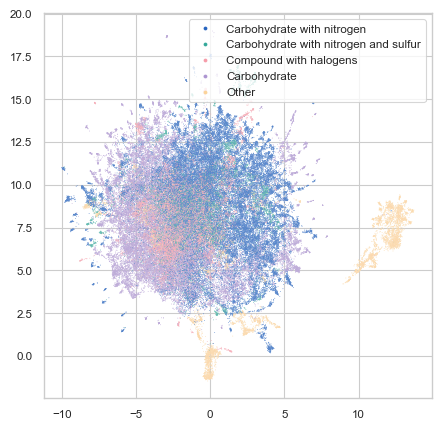

In [10]:
random.seed(777)
idx = random.sample(list(range(embs.shape[0])), 100_000)
embs_sample = embs[idx]

reducer = umap.UMAP(metric='cosine', min_dist=0.4, n_neighbors=50)
embs_umap = reducer.fit_transform(embs_sample)
init_plotting(figsize=(5, 5))
formulas = np.array(msdata['FORMULA'])[idx]
sns.scatterplot(
    x=embs_umap[:, 0],
    y=embs_umap[:, 1],
    hue=[formula_type(f) for f in formulas],
    alpha=1,
    s=0.3,
    palette=['#2664BF', '#34A89A', '#F69CA9', '#AD95D1', '#FBD399']
)
plt.legend(markerscale=5)
plt.show()

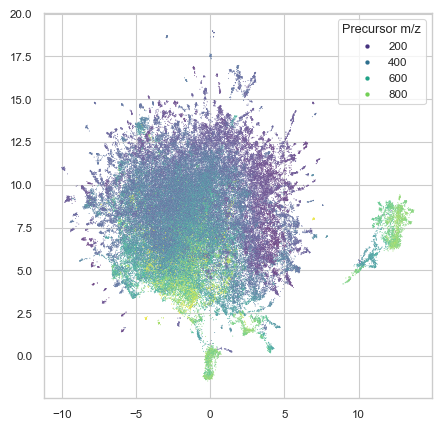

In [11]:
init_plotting(figsize=(5, 5))
sns.scatterplot(
    x=embs_umap[:, 0],
    y=embs_umap[:, 1],
    hue=msdata.get_prec_mzs()[idx],
    alpha=1,
    s=0.4,
    palette='viridis'
)
plt.legend(title='Precursor m/z', markerscale=5)
plt.show()